In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.ml.stat import Correlation


#pd.set_option('display.max_columns', None)

spark = spark = SparkSession \
    .builder \
    .appName("CCproject") \
    .getOrCreate()

In [2]:
circuits_schema= StructType([
    StructField("circuitId", IntegerType(), True),
    StructField("circuitRef", StringType(), True),
    StructField("name", StringType(), True),
    StructField("location", StringType(), True),
    StructField("country", StringType(), True),
    StructField("lat", DoubleType(), True),
    StructField("lng", DoubleType(), True),
    StructField("alt", IntegerType(), True),
    StructField("url", StringType(), True)
])
    
drivers_schema= StructType([
    StructField("driverId", IntegerType(), True),
    StructField("driverRef", StringType(), True),
    StructField("number", IntegerType(), True),
    StructField("code", StringType(), True),
    StructField("forename", StringType(), True),
    StructField("surname", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("nationality", StringType(), True),
    StructField("url", StringType(), True)
])

driver_standings_schema= StructType([
    StructField("driverStandingsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("wins", IntegerType(), True)
])

quali_schema= StructType([
    StructField("qualifyId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("number", IntegerType(), True),
    StructField("position", IntegerType(), True),
    StructField("q1", StringType(), True),
    StructField("q2", StringType(), True),
    StructField("q3", StringType(), True)
])


pitstops_schema= StructType([
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("stop", IntegerType(), True),
    StructField("lap", IntegerType(), True),
    StructField("time", StringType(), True),
    StructField("duration", StringType(), True),
    StructField("milliseconds", IntegerType(), True)
])

races_schema= StructType([
    StructField("raceId", IntegerType(), True),
    StructField("year", IntegerType(), True),
    StructField("round", IntegerType(), True),
    StructField("circuitId", IntegerType(), True),
    StructField("name", StringType(), True),
    StructField("date", DateType(), True),
    StructField("time", StringType(), True),
    StructField("url", StringType(), True),
    StructField("fp1_date", DateType(), True),
    StructField("fp1_time", StringType(), True),
    StructField("fp2_date", DateType(), True),
    StructField("fp2_time", StringType(), True),
    StructField("fp3_date", DateType(), True),
    StructField("fp3_time", StringType(), True),
    StructField("quali_date", DateType(), True),
    StructField("quali_time", StringType(), True),
    StructField("sprint_date", DateType(), True),
    StructField("sprint_time", StringType(), True)
])

results_schema= StructType([
    StructField("resultId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("driverId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("number", IntegerType(), True),
    StructField("grid", IntegerType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("positionOrder", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("laps", IntegerType(), True),
    StructField("time", StringType(), True),
    StructField("milliseconds", IntegerType(), True),
    StructField("fastestLap", IntegerType(), True),
    StructField("rank", IntegerType(), True),
    StructField("fastestLapTime", StringType(), True),
    StructField("fastestLapSpeed", StringType(), True),
    StructField("statusId", IntegerType(), True)
])

constructor_standings_schema= StructType([
    StructField("constructorStandingsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("points", DoubleType(), True),
    StructField("position", IntegerType(), True),
    StructField("positionText", StringType(), True),
    StructField("wins", IntegerType(), True)
])

constructor_results_schema= StructType([
    StructField("constructorResultsId", IntegerType(), True),
    StructField("raceId", IntegerType(), True),
    StructField("constructorId", IntegerType(), True),
    StructField("points", IntegerType(), True),
    StructField("status", StringType(), True)
])

constructors_schema= StructType([
    StructField("constructorId", IntegerType(), True),
    StructField("constructorRef", StringType(), True),
    StructField("name", StringType(), True),
    StructField("nationality", StringType(), True),
    StructField("url", StringType(), True)
])

status_schema= StructType([
    StructField("statusId", IntegerType(), True),
    StructField("status", StringType(), True)
])


In [3]:
circuits= spark.read.csv("hdfs://namenode:8020/f1data/circuits.csv", header=True, schema=circuits_schema)
drivers= spark.read.csv("hdfs://namenode:8020/f1data/drivers.csv", header=True, schema=drivers_schema)
driver_standings= spark.read.csv("hdfs://namenode:8020/f1data/driver_standings.csv", header=True, schema=driver_standings_schema)
quali= spark.read.csv("hdfs://namenode:8020/f1data/qualifying.csv", header=True, schema=quali_schema)
pitstops= spark.read.csv("hdfs://namenode:8020/f1data/pit_stops.csv", header=True, schema=pitstops_schema)
races= spark.read.csv("hdfs://namenode:8020/f1data/races.csv", header=True, schema=races_schema)
results= spark.read.csv("hdfs://namenode:8020/f1data/results.csv", header=True, schema=results_schema)
constructor_standings= spark.read.csv("hdfs://namenode:8020/f1data/constructor_standings.csv", header=True, schema=constructor_standings_schema)
constructor_results= spark.read.csv("hdfs://namenode:8020/f1data/constructor_results.csv", header=True, schema=constructor_results_schema)
constructors= spark.read.csv("hdfs://namenode:8020/f1data/constructors.csv", header=True, schema=constructors_schema)
status= spark.read.csv("hdfs://namenode:8020/f1data/status.csv", header=True, schema=status_schema)

Showing the columns headings for each data frame:

# EDA

1. Handling Missing Values and Cleaning the data:

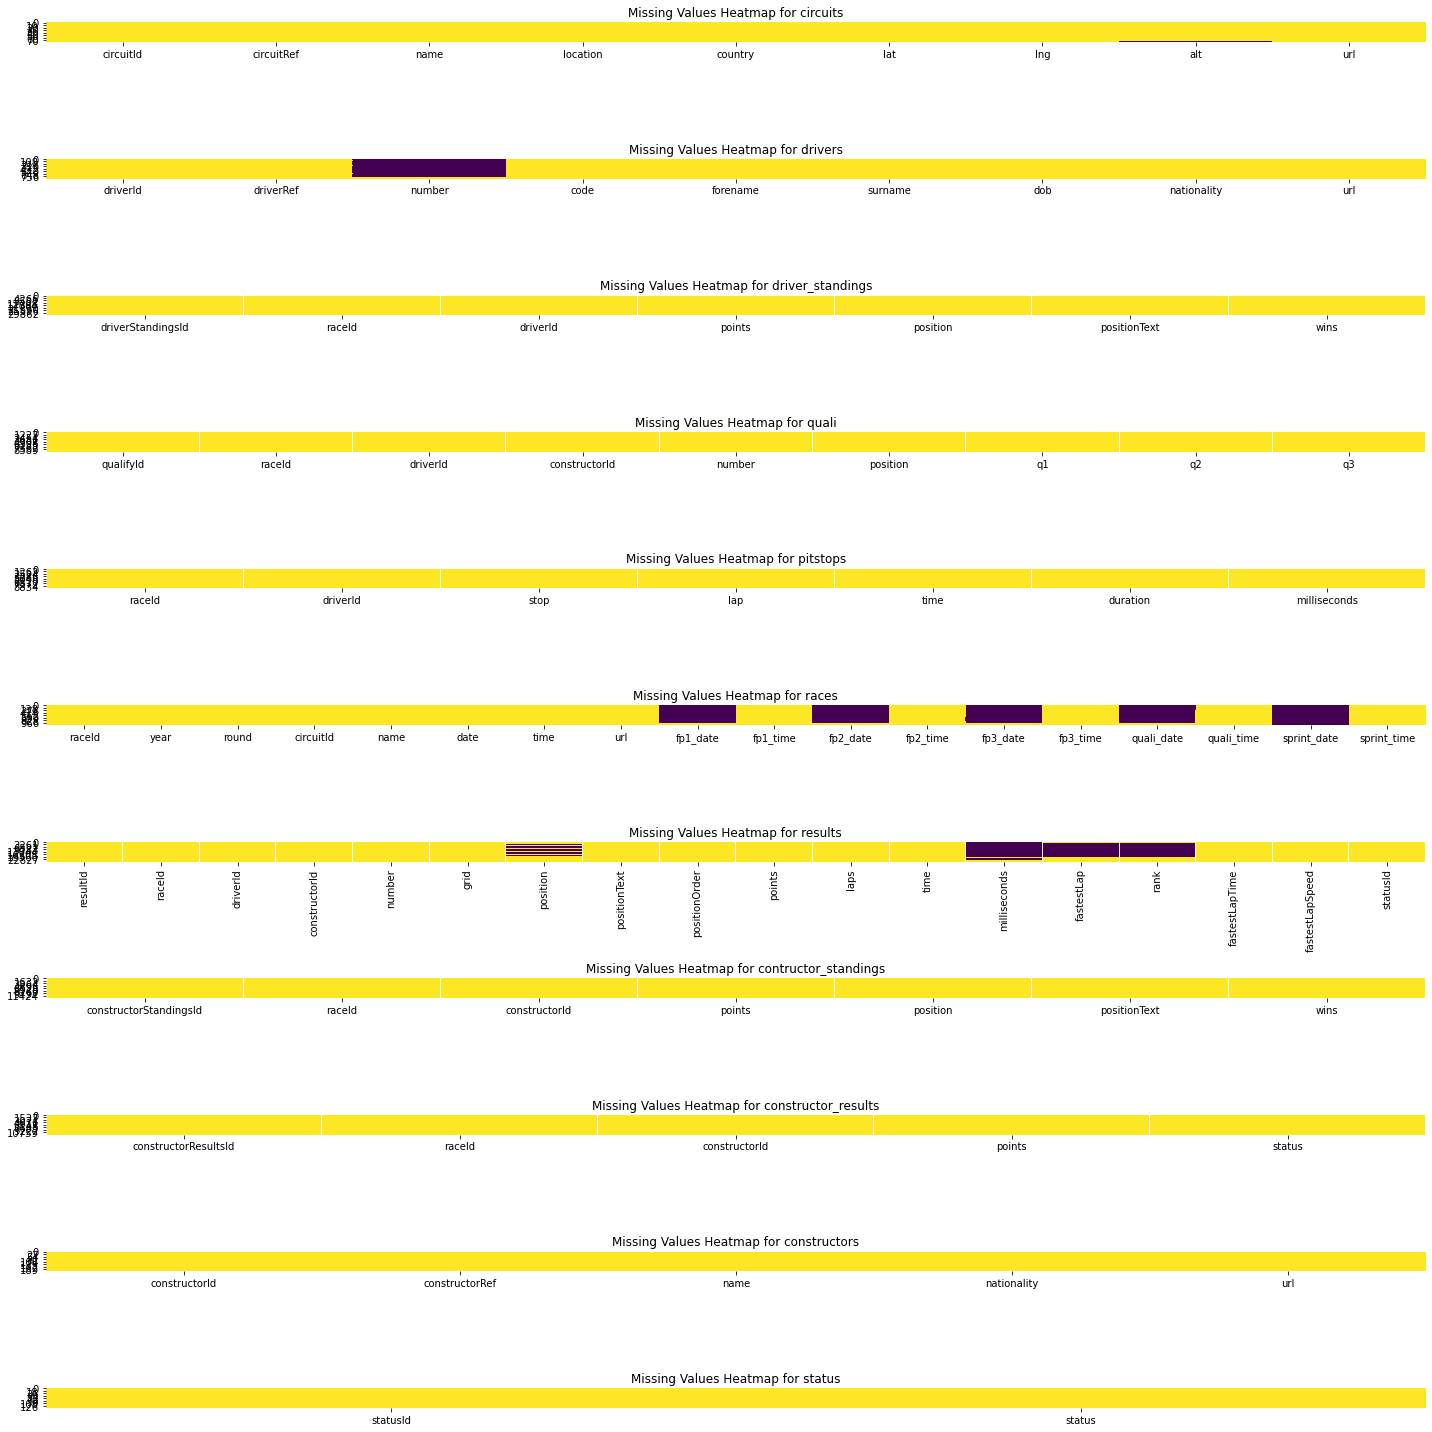

In [4]:
dataframes = [circuits, drivers, driver_standings, quali, pitstops, races, results, constructor_standings, constructor_results, constructors, status]
dataframe_names = ['circuits', 'drivers', 'driver_standings', 'quali', 'pitstops', 'races', 'results', 'contructor_standings', 'constructor_results', 'constructors', 'status']
fig, axes = plt.subplots(len(dataframes), 1, figsize=(20, 20))

for idx, (df, df_name) in enumerate(zip(dataframes, dataframe_names)):
    missing_values = df.select([col(c).isNull().alias(c) for c in df.columns])
    missing_values_pd = missing_values.toPandas()
    
    sns.heatmap(missing_values_pd, cmap='viridis_r', cbar=False, ax=axes[idx])
    axes[idx].set_title(f'Missing Values Heatmap for {df_name}')

plt.tight_layout()
plt.show()

From the above diagram we can see that the following dataframes have missing values:
circuits, drivers, races, results

Thus let's look at these in further detail:

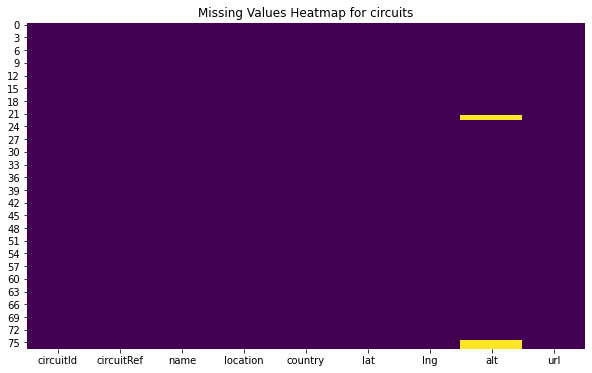

In [5]:
missing_values_circuits = circuits.select([col(c).isNull().alias(c) for c in circuits.columns])

missing_values_pd_circuits = missing_values_circuits.toPandas()

plt.figure(figsize=(10 ,6))
sns.heatmap(missing_values_pd_circuits, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for circuits')
plt.show()

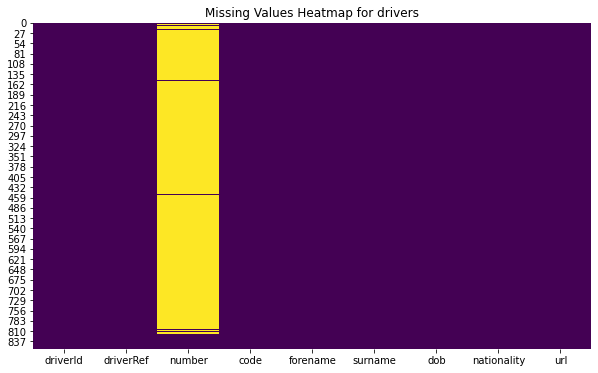

In [6]:
missing_values_drivers = drivers.select([col(c).isNull().alias(c) for c in drivers.columns])

missing_values_pd_drivers = missing_values_drivers.toPandas()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_drivers, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for drivers')
plt.show()

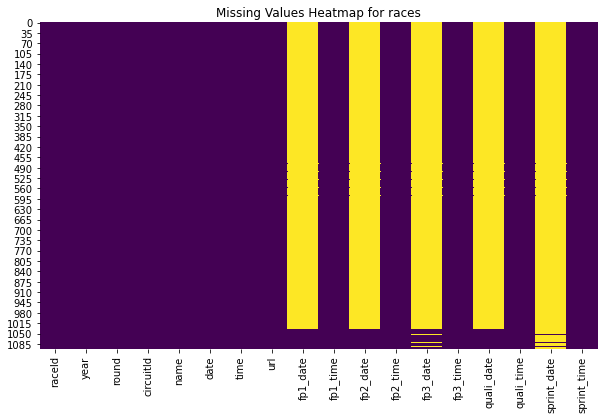

In [7]:
missing_values_races = races.select([col(c).isNull().alias(c) for c in races.columns])

missing_values_pd_races = missing_values_races.toPandas()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_races, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for races')
plt.show()

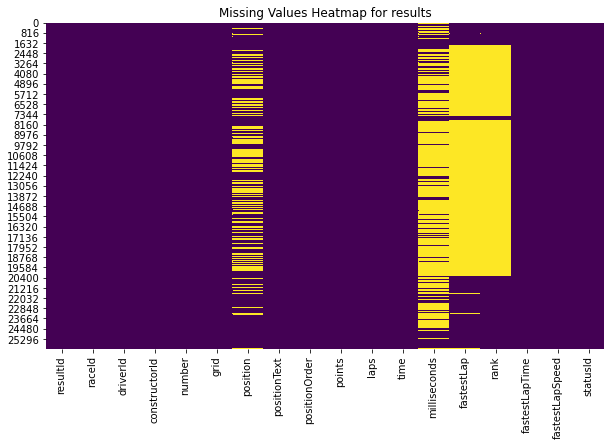

In [8]:
missing_values_results = results.select([col(c).isNull().alias(c) for c in results.columns])

missing_values_pd_results = missing_values_results.toPandas()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_pd_results, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap for results')
plt.show()

All the columns containing missing values in the above data frames are not required for the EDA. Thus, we can delete these columns:

In [9]:
circuits= circuits.drop("alt")
drivers= drivers.drop("number")
races= races.drop("fp1_date","fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date","quali_time", "sprint_date", "sprint_time")
results= results.drop("position", "milliseconds", "fastestLap", "fastestLapTime", "fastestLapSpeed", "rank")

Now, as there are no missing values remaining, data imputation is not required

2. We can now begin finding the data trends between all the variables in the dataset:

- Firstly, lets look at the results dataset to find which driver has had the most number of wins in F1 since the 1950s:

In [10]:
most_wins= results.drop("number", "positionText", "laps", "time", "statusId")
most_wins= most_wins.join(races, "raceId", "inner")
most_wins= most_wins.drop("round", "date", "time", "url")

most_wins= most_wins.join(drivers, "driverId", "inner")
most_wins = most_wins.withColumn("full_name", concat(col("forename"), lit(" "), col("surname")))
most_wins= most_wins.drop("driverRef", "code", "dob", "url")

In [11]:
first_place_results = most_wins.filter(col("positionOrder") == 1)
driver_win_count = first_place_results.groupBy("driverId", "full_name").count()

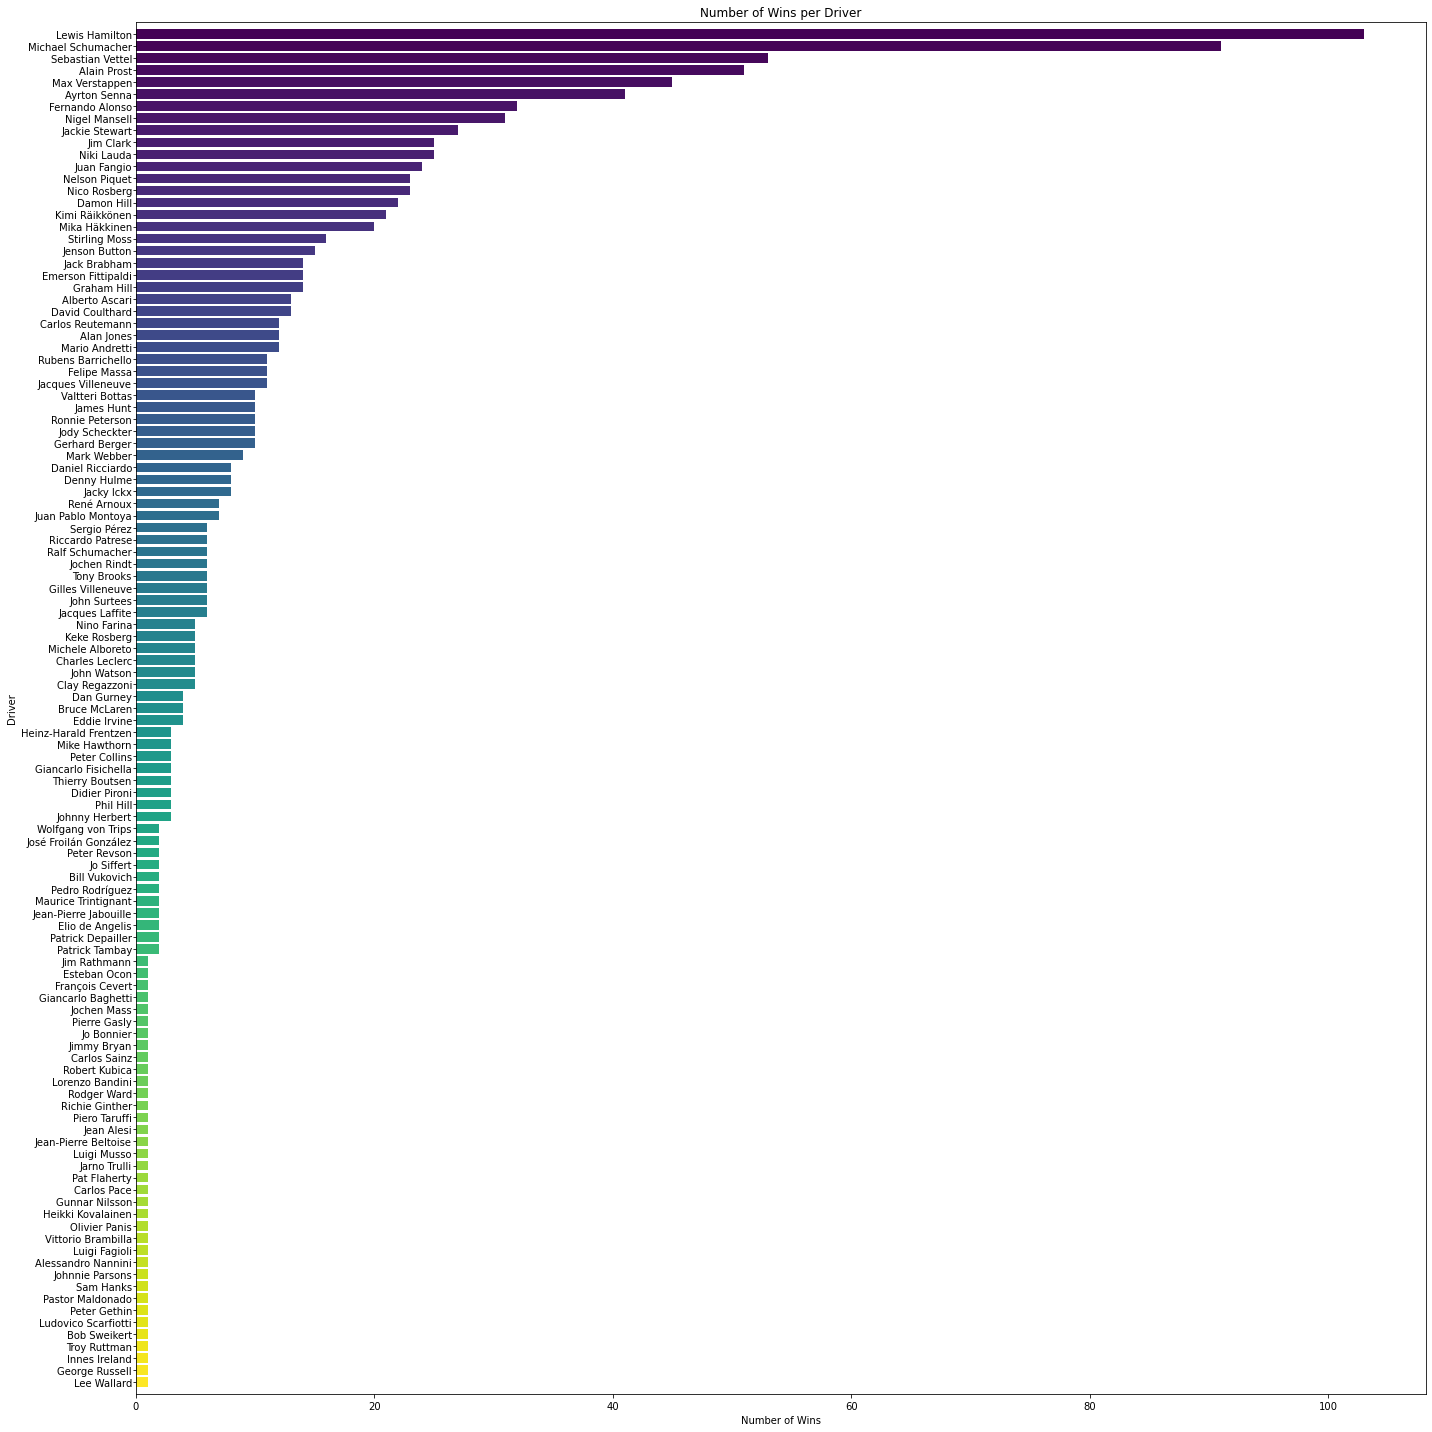

In [12]:
import numpy as np
driver_win_count_pd = driver_win_count.toPandas()
driver_win_count_pd = driver_win_count_pd.sort_values(by="count", ascending=True)

colors = plt.cm.viridis_r(np.linspace(0, 1, len(driver_win_count_pd)))

bar_gap = 0.15
plt.figure(figsize=(20, 20))
plt.barh(driver_win_count_pd["full_name"], driver_win_count_pd["count"], align='center', color=colors)
plt.xlabel("Number of Wins")
plt.ylabel("Driver")
plt.title("Number of Wins per Driver")

plt.tick_params(axis='y', pad=bar_gap)
plt.margins(y=0.005)
plt.tight_layout()

plt.show()

Based on the above plot, we can see that Lewis Hamilton, Michael Schumacher and Sebastian Vettel have won the most number of races.

- Next, lets look at which team has won the constuctor championship each year:

In [13]:
constructors= constructors.drop("nationality")
constructors= constructors.withColumnRenamed('name', 'team_name')
constructor_wins= most_wins.join(constructors, "constructorId", "inner")
constructor_wins= constructor_wins.drop("constructorRef", "url")
constructor_wins.head()

Row(constructorId=1, driverId=1, raceId=18, resultId=1, grid=1, positionOrder=1, points=10.0, year=2008, circuitId=1, name='Australian Grand Prix', forename='Lewis', surname='Hamilton', nationality='British', full_name='Lewis Hamilton', team_name='McLaren')

In [14]:
team_points= constructor_wins.groupBy('year', 'team_name').agg(sum('points').alias('total_points'))

max_points_team= team_points.groupBy('year').agg(max('total_points').alias('max_points'))
max_points_team= max_points_team.withColumnRenamed('year', 'extra_year')

constructors_championship= team_points.join(max_points_team, (team_points['year'] == max_points_team['extra_year']) & (team_points['total_points'] == max_points_team['max_points']))
constructors_championship= constructors_championship.drop("max_points", "extra_year")

constructors_championship.head(5)

[Row(year=1973, team_name='Tyrrell', total_points=118.0),
 Row(year=1978, team_name='Team Lotus', total_points=116.0),
 Row(year=1986, team_name='Williams', total_points=141.0),
 Row(year=1965, team_name='BRM', total_points=81.0),
 Row(year=2009, team_name='Brawn', total_points=172.0)]

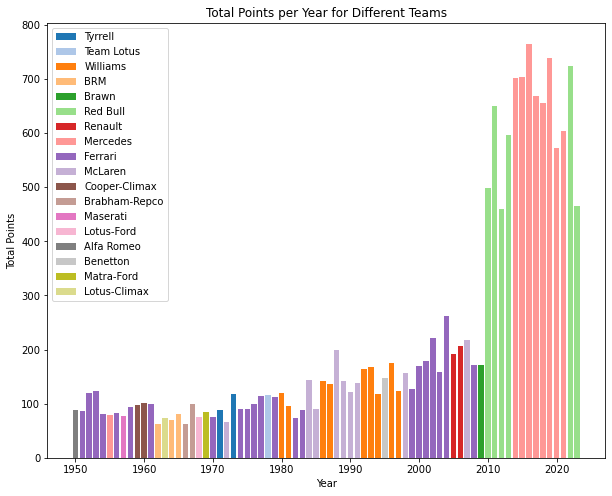

In [15]:
counstructor_count_pd = constructors_championship.toPandas()
#counstructor_count_pd = counstructor_count_pd.sort_values(by="total_points", ascending=True)

team_colors = sns.color_palette("tab20", n_colors=len(counstructor_count_pd['team_name'].unique()))


plt.figure(figsize=(10, 8))
for i, team in enumerate(counstructor_count_pd['team_name'].unique()):
    team_data = counstructor_count_pd[counstructor_count_pd['team_name'] == team]
    plt.bar(team_data['year'], team_data['total_points'], color=team_colors[i], label=team)

plt.xlabel('Year')
plt.ylabel('Total Points')
plt.title('Total Points per Year for Different Teams')
plt.legend()

plt.show()

-  Now, lets plot which team has won the constructor the most:

In [16]:
team_mentions= constructors_championship.groupBy("team_name").agg(count("*").alias("Number of constructor_championships"))

In [17]:
team_mentions_pd= team_mentions.toPandas()
team_mentions_pd= team_mentions_pd.sort_values(by="Number of constructor_championships", ascending=True)
#team_mentions_pd.head()

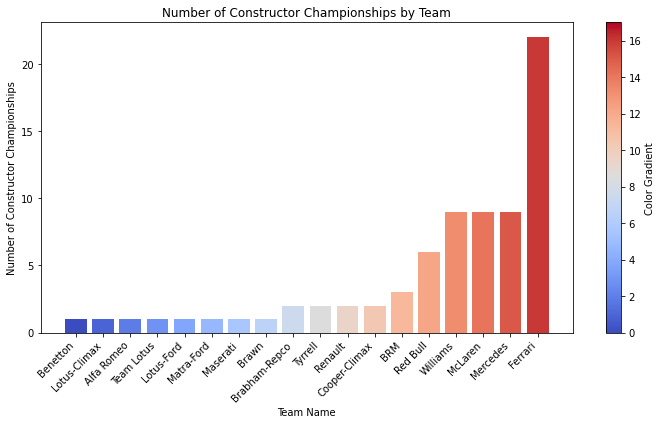

In [18]:
cmap = plt.get_cmap('coolwarm')
plt.figure(figsize=(10, 6))
bars = plt.bar(
    team_mentions_pd["team_name"], team_mentions_pd["Number of constructor_championships"], 
    color=[cmap(i / len(team_mentions_pd["team_name"])) for i in range(len(team_mentions_pd["team_name"]))]
)
#plt.bar(team_mentions_pd["team_name"], team_mentions_pd["Number of constructor_championships"], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Number of Constructor Championships')
plt.title('Number of Constructor Championships by Team')
plt.xticks(rotation=45, ha="right")  # Rotate X-axis labels for better visibility
plt.tight_layout()  # Adjust layout for labels

sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=len(team_mentions_pd["team_name"])-1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Color Gradient')
plt.show()

- Let's now find which driver has won the driver's the constructor the most and which team were they a part of when they won each one:

In [43]:
driver_points = constructor_wins.groupBy('year','full_name','team_name').agg(sum('points').alias('total_points'))

max_points_driver= driver_points.groupBy('year').agg(max('total_points').alias('max_points'))
max_points_driver= max_points_driver.withColumnRenamed('year', 'extra_year')

drivers_championship= driver_points.join(max_points_driver, (driver_points['year'] == max_points_driver['extra_year']) & (driver_points['total_points'] == max_points_driver['max_points']))
drivers_championship= drivers_championship.drop("max_points", "extra_year")

# driver_mentions= drivers_championship.groupBy("full_name").agg(count("*").alias("Number of driver_championships"))

championships_per_team = drivers_championship.groupBy("full_name", "team_name").agg(count("*").alias("driver_championships"))

championships_per_team.head(5)

[Row(full_name='Mika Häkkinen', team_name='McLaren', driver_championships=2),
 Row(full_name='Michael Schumacher', team_name='Ferrari', driver_championships=5),
 Row(full_name='Jack Brabham', team_name='Cooper-Climax', driver_championships=2),
 Row(full_name='Graham Hill', team_name='BRM', driver_championships=2),
 Row(full_name='Juan Fangio', team_name='Mercedes', driver_championships=2)]

<Figure size 720x432 with 0 Axes>

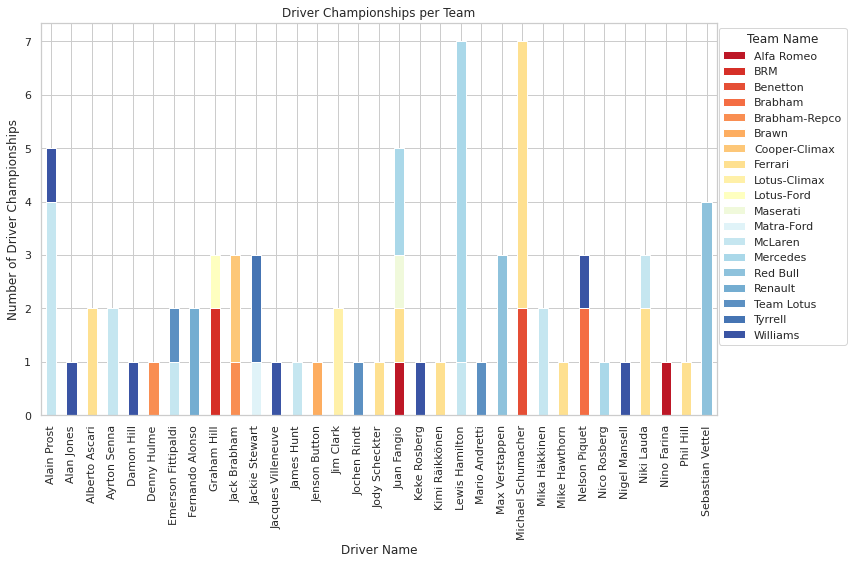

In [66]:
driver_championships_pd= championships_per_team.toPandas()
pivot_df = driver_championships_pd.pivot(index='full_name', columns='team_name', values='driver_championships').fillna(0)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("RdYlBu", n_colors=len(pivot_df.columns))

pivot_df.plot(kind='bar', stacked=True, color=palette, figsize=(12, 8))
plt.ylabel('Number of Driver Championships')
plt.xlabel('Driver Name')
plt.title('Driver Championships per Team')
plt.legend(title='Team Name', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()